# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.simplefilter("always") 


In [2]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.23.5
pandas version: 1.5.3
matplotlib version: 3.7.0
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df1 = pd.read_parquet('2023-1.parquet')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [45]:
file_list

['2023-12.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-5.parquet',
 '2023-11.parquet',
 '2023-10.parquet',
 '2023-4.parquet',
 '2023-1.parquet',
 '2023-8.parquet',
 '2023-9.parquet',
 '2023-2.parquet',
 '2023-3.parquet']

In [112]:
import os

os.chdir('/Users/arjunpalit/Desktop/Python_Learning/MyProjects/trip_records')
# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        #file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file

        df_file=pd.read_parquet(file_name)
        
        
        df_file['day'] = df_file['tpep_pickup_datetime'].dt.day
        df_file['hour'] = df_file['tpep_pickup_datetime'].dt.hour
        df_file['date']= df_file['tpep_pickup_datetime'].dt.date
               
        #sample the current file
        sampled_data = df_file.sample(frac = 0.008, random_state = 42)
        
        #append sampled data
        df = pd.concat([df, sampled_data])

        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file .DS_Store: 'NoneType' object is not iterable
Error reading file df_final.csv: [Errno 22] Invalid argument


In [113]:
len(df)

303427

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-12-14 15:41:50   2023-12-14 16:52:03              2.0   
1              2  2023-12-27 22:23:14   2023-12-27 22:34:26              1.0   
2              1  2023-12-05 21:11:39   2023-12-05 21:34:54              1.0   
3              2  2023-12-30 20:23:25   2023-12-30 20:38:48              1.0   
4              1  2023-12-13 13:43:18   2023-12-13 13:49:02              1.0   
...          ...                  ...                   ...              ...   
303422         2  2023-06-26 21:17:12   2023-06-26 21:25:11              1.0   
303423         1  2023-06-28 16:16:09   2023-06-28 16:33:30              1.0   
303424         2  2023-06-15 06:04:58   2023-06-15 06:25:00              1.0   
303425         2  2023-06-16 20:27:21   2023-06-16 20:36:25              1.0   
303426         2  2023-06-01 19:18:33   2023-06-01 19:28:36              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               20.88         3.0                  N           239   
1                0.90         1.0                  N           163   
2                3.80         1.0                  N           158   
3                1.34         1.0                  N            68   
4                0.50         1.0                  N           237   
...               ...         ...                ...           ...   
303422           1.37         1.0                  N           164   
303423           1.70         1.0                  N           161   
303424           9.59         1.0                  N           164   
303425           1.51         1.0                  N           107   
303426           1.61         1.0                  N           236   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                  1             2  ...        0.00         29.00   
1                162             1  ...        4.10          0.00   
2                256             1  ...        5.50          0.00   
3                 48             2  ...        0.00          0.00   
4                140             1  ...        2.00          0.00   
...              ...           ...  ...         ...           ...   
303422           107             1  ...        3.00          0.00   
303423           237             1  ...        4.28          0.00   
303424           138             1  ...       10.71          6.55   
303425           249             2  ...        0.00          0.00   
303426           239             1  ...        2.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0        141.20                   0.0   
1                         1.0         20.50                   2.5   
2                         1.0         33.10                   2.5   
3                         1.0         19.20                   2.5   
4                         1.0         11.80                   2.5   
...                       ...           ...                   ...   
303422                    1.0         18.00                   2.5   
303423                    1.0         25.68                   2.5   
303424                    1.0         64.26                   2.5   
303425                    1.0         15.00                   2.5   
303426                    1.0         19.90                   2.5   

        Airport_fee  day  hour        date  airport_fee  
0               0.0   14    15  2023-12-14          NaN  
1               0.0   27    22  2023-12-27          NaN  
2               0.0    5    21  2023-12-05          NaN  
3               0.0   30    20  2023-12-30          NaN  
4               0.0   13    13  2023-12-13          NaN  
...             ...  ...   ...         ...          ...  
303422          0.0   26    21  2023-06-26          NaN  
303423          0.0   28    16  2023-06-28          NaN  
303424          0.0   15  

In [114]:
# Store the df in csv/parquet
df.to_csv('df_final.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [168]:
# Load the new data file

df=pd.read_csv('df_final.csv')

In [116]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     1586515         2  2023-12-14 15:41:50   2023-12-14 16:52:03   
1     2875597         2  2023-12-27 22:23:14   2023-12-27 22:34:26   
2      553397         1  2023-12-05 21:11:39   2023-12-05 21:34:54   
3     3110866         2  2023-12-30 20:23:25   2023-12-30 20:38:48   
4     1441167         1  2023-12-13 13:43:18   2023-12-13 13:49:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              2.0          20.88         3.0                  N   
1              1.0           0.90         1.0                  N   
2              1.0           3.80         1.0                  N   
3              1.0           1.34         1.0                  N   
4              1.0           0.50         1.0                  N   

   PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0           239             1  ...         0.0          29.0   
1           163           162  ...         4.1           0.0   
2           158           256  ...         5.5           0.0   
3            68            48  ...         0.0           0.0   
4           237           140  ...         2.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         141.2                   0.0          0.0   
1                    1.0          20.5                   2.5          0.0   
2                    1.0          33.1                   2.5          0.0   
3                    1.0          19.2                   2.5          0.0   
4                    1.0          11.8                   2.5          0.0   

   day  hour        date  airport_fee  
0   14    15  2023-12-14          NaN  
1   27    22  2023-12-27          NaN  
2    5    21  2023-12-05          NaN  
3   30    20  2023-12-30          NaN  
4   13    13  2023-12-13          NaN  

[5 rows x 24 columns]

In [27]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303427 entries, 0 to 303426
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             303427 non-null  int64  
 1   VendorID               303427 non-null  int64  
 2   tpep_pickup_datetime   303427 non-null  object 
 3   tpep_dropoff_datetime  303427 non-null  object 
 4   passenger_count        293109 non-null  float64
 5   trip_distance          303427 non-null  float64
 6   RatecodeID             293109 non-null  float64
 7   store_and_fwd_flag     293109 non-null  object 
 8   PULocationID           303427 non-null  int64  
 9   DOLocationID           303427 non-null  int64  
 10  payment_type           303427 non-null  int64  
 11  fare_amount            303427 non-null  float64
 12  extra                  303427 non-null  float64
 13  mta_tax                303427 non-null  float64
 14  tip_amount             303427 non-nu

In [169]:
len(df)

303427

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [170]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(['day','hour','date'],axis=1,inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303427 entries, 0 to 303426
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             303427 non-null  int64  
 1   VendorID               303427 non-null  int64  
 2   tpep_pickup_datetime   303427 non-null  object 
 3   tpep_dropoff_datetime  303427 non-null  object 
 4   passenger_count        293109 non-null  float64
 5   trip_distance          303427 non-null  float64
 6   RatecodeID             293109 non-null  float64
 7   store_and_fwd_flag     293109 non-null  object 
 8   PULocationID           303427 non-null  int64  
 9   DOLocationID           303427 non-null  int64  
 10  payment_type           303427 non-null  int64  
 11  fare_amount            303427 non-null  float64
 12  extra                  303427 non-null  float64
 13  mta_tax                303427 non-null  float64
 14  tip_amount             303427 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [171]:
# Combine the two airport fee columns

df[['Airport_fee','airport_fee']]

Airport_fee  airport_fee
0               0.0          NaN
1               0.0          NaN
2               0.0          NaN
3               0.0          NaN
4               0.0          NaN
...             ...          ...
303422          0.0          NaN
303423          0.0          NaN
303424          0.0          NaN
303425          0.0          NaN
303426          0.0          NaN

[303427 rows x 2 columns]

In [42]:
df[df['Airport_fee']=='nan']

Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, airport_fee]
Index: []

[0 rows x 21 columns]

In [172]:
df['Airport_fee_new']=df[['Airport_fee','airport_fee']].sum(axis=1)

In [173]:
df['Airport_fee_new'].unique()

array([ 0.  ,  1.75,  1.25, -1.25])

In [174]:
df['airport_fee']=df['Airport_fee_new']

In [175]:
df.drop(['Airport_fee','Airport_fee_new'],axis=1,inplace=True)

In [55]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-12-14 15:41:50   2023-12-14 16:52:03   
1           1         2  2023-12-27 22:23:14   2023-12-27 22:34:26   
2           2         1  2023-12-05 21:11:39   2023-12-05 21:34:54   
3           3         2  2023-12-30 20:23:25   2023-12-30 20:38:48   
4           4         1  2023-12-13 13:43:18   2023-12-13 13:49:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              2.0          20.88         3.0                  N   
1              1.0           0.90         1.0                  N   
2              1.0           3.80         1.0                  N   
3              1.0           1.34         1.0                  N   
4              1.0           0.50         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           239             1             2        111.2    0.0      0.0   
1           163           162             1         11.4    1.0      0.5   
2           158           256             1         22.6    3.5      0.5   
3            68            48             2         14.2    1.0      0.5   
4           237           140             1          5.8    2.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0         0.0          29.0                    1.0         141.2   
1         4.1           0.0                    1.0          20.5   
2         5.5           0.0                    1.0          33.1   
3         0.0           0.0                    1.0          19.2   
4         2.0           0.0                    1.0          11.8   

   congestion_surcharge  airport_fee  
0                   0.0          0.0  
1                   2.5          0.0  
2                   2.5          0.0  
3                   2.5          0.0  
4                   2.5          0.0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [123]:
# check where values of fare amount are negative
df[df['airport_fee']<0].head()


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
85436       342076         2  2023-02-04 09:25:08   2023-02-04 10:01:21   
186934     1101599         2  2023-01-13 06:19:23   2023-01-13 06:19:27   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
85436               1.0          23.11         1.0                  N   
186934              1.0           0.00         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
85436            132           257  ...     -0.5         0.0           0.0   
186934           132           132  ...     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  day  hour  \
85436                    -1.0         -2.75                   0.0    4     9   
186934                   -1.0         -2.75                   0.0   13     6   

              date  airport_fee  
85436   2023-02-04        -1.25  
186934  2023-01-13        -1.25  

[2 rows x 23 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [176]:
# Analyse RatecodeID for the negative fare amounts

df[df['airport_fee']<0][['RatecodeID','airport_fee']]



RatecodeID  airport_fee
85436          1.0        -1.25
186934         1.0        -1.25

In [177]:
# Find which columns have negative values

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Find columns with any negative values
negative_columns = numeric_df.columns[(numeric_df < 0).any()].tolist()

print(negative_columns)

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [178]:
# fix these negative values

#since the negative valued colums are in fare data , we will replace them with 0

df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').clip(lower=0)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [179]:
# Find the proportion of missing values in each column

missing_values_proportion = df.isna().mean()
print(missing_values_proportion)

Unnamed: 0               0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034005
trip_distance            0.000000
RatecodeID               0.034005
store_and_fwd_flag       0.034005
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034005
airport_fee              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [126]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df[df['passenger_count'].isna()]

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
30         3254262         2  2023-12-12 00:03:01   2023-12-12 00:28:02   
31         3265339         1  2023-12-13 17:12:34   2023-12-13 17:48:18   
47         3258873         2  2023-12-12 20:56:22   2023-12-12 21:15:14   
49         3322914         2  2023-12-19 12:54:23   2023-12-19 13:11:22   
75         3348005         2  2023-12-22 16:53:54   2023-12-22 17:04:18   
...            ...       ...                  ...                   ...   
303185     3272906         2  2023-06-20 16:34:16   2023-06-20 17:36:53   
303225     3225085         2  2023-06-06 08:23:29   2023-06-06 08:41:15   
303238     3296168         2  2023-06-27 22:27:00   2023-06-27 22:34:00   
303255     3303663         2  2023-06-29 22:39:00   2023-06-29 22:58:00   
303403     3269260         1  2023-06-19 08:42:44   2023-06-19 08:44:34   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
30                  NaN           7.72         NaN                NaN   
31                  NaN           3.30         NaN                NaN   
47                  NaN           3.57         NaN                NaN   
49                  NaN           3.98         NaN                NaN   
75                  NaN           1.67         NaN                NaN   
...                 ...            ...         ...                ...   
303185              NaN           6.35         NaN                NaN   
303225              NaN           4.38         NaN                NaN   
303238              NaN           1.59         NaN                NaN   
303255              NaN           4.09         NaN                NaN   
303403              NaN           0.40         NaN                NaN   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
30                68            42  ...      0.5        0.00           0.0   
31               230           236  ...      0.5        4.78           0.0   
47               231            48  ...      0.5        0.00           0.0   
49               116           143  ...      0.5        0.00           0.0   
75               236           142  ...      0.5        0.00           0.0   
...              ...           ...  ...      ...         ...           ...   
303185           262           244  ...      0.5        0.00           0.0   
303225           140           107  ...      0.5        0.00           0.0   
303238           142           246  ...      0.5        3.45           0.0   
303255           246           231  ...      0.5        0.00           0.0   
303403           237           237  ...      0.5        1.26           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  day  hour  \
30                        1.0         35.65                   NaN   12     0   
31                        1.0         36.68                   NaN   13    17   
47                        1.0         23.61                   NaN   12    20   
49                        1.0         20.23                   NaN   19    12   
75                        1.0         19.89                   NaN   22    16   
...                       ...           ...                   ...  ...   ...   
303185                    1.0         39.29                   NaN   20    16   
303225                    1.0         28.24                   NaN    6     8   
303238                    1.0         20.69                   NaN   27    22   
303255                    1.0         23.23                   NaN   29    22   
303403                    1.0          9.66                   NaN   19     8   

              date  airport_fee  
30      2023-12-12          0.0  
31      2023-12-13          0.0  
47      2023-12-12          0.0  
49      2023-12-19          0.0  
75      2023-12-22          0.0  
...            ...          ...  
303185  2023-06-20          0.0  
303225  2023-06-06          0.0  
303238  2023-06-27        

In [180]:
df['passenger_count'].fillna(1,inplace=True)

In [162]:
df[df['passenger_count']==0].head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
112     1819575         1  2023-12-16 10:33:05   2023-12-16 11:03:26   
144     1700394         1  2023-12-15 12:02:37   2023-12-15 12:07:44   
200     3092649         1  2023-12-30 16:05:48   2023-12-30 16:22:26   
248     3082315         1  2023-12-30 14:50:03   2023-12-30 15:11:35   
303     3095982         1  2023-12-30 17:30:51   2023-12-30 17:35:00   

     passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
112              0.0           14.2         3.0                  N   
144              0.0            0.5         1.0                  N   
200              0.0            2.3         1.0                  N   
248              0.0            3.6         1.0                  N   
303              0.0            0.7         1.0                  N   

     PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
112           158             1  ...      0.0       17.55         12.75   
144           142           239  ...      0.5        3.10          0.00   
200           230           236  ...      0.5        6.25          0.00   
248           161           166  ...      0.5        5.15          0.00   
303           151           264  ...      0.5        1.60          0.00   

     improvement_surcharge  total_amount  congestion_surcharge  day  hour  \
112                    1.0        105.40                   0.0   16    10   
144                    1.0         13.60                   2.5   15    12   
200                    1.0         27.25                   2.5   30    16   
248                    1.0         31.05                   2.5   30    14   
303                    1.0          9.60                   0.0   30    17   

           date  airport_fee  
112  2023-12-16          NaN  
144  2023-12-15          NaN  
200  2023-12-30          NaN  
248  2023-12-30          NaN  
303  2023-12-30          NaN  

[5 rows x 23 columns]

Did you find zeroes in passenger_count? Handle these.

In [163]:
#Before

len(df[df['passenger_count']==0]) 

4618

In [181]:
df.loc[df['passenger_count']==0,'passenger_count']=1

In [182]:
#AFTER
len(df[df['passenger_count']==0]) 

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [183]:
# Fix missing values in 'RatecodeID'

df['RatecodeID'].fillna(1,inplace=True)

#passenger count is 1

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [184]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(0,inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [185]:
# Handle any remaining missing values

missing_values_proportion = df.isna().mean()
print(missing_values_proportion)

Unnamed: 0               0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.034005
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.000000
dtype: float64


In [132]:
df[df['store_and_fwd_flag'].isna()]

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
30         3254262         2  2023-12-12 00:03:01   2023-12-12 00:28:02   
31         3265339         1  2023-12-13 17:12:34   2023-12-13 17:48:18   
47         3258873         2  2023-12-12 20:56:22   2023-12-12 21:15:14   
49         3322914         2  2023-12-19 12:54:23   2023-12-19 13:11:22   
75         3348005         2  2023-12-22 16:53:54   2023-12-22 17:04:18   
...            ...       ...                  ...                   ...   
303185     3272906         2  2023-06-20 16:34:16   2023-06-20 17:36:53   
303225     3225085         2  2023-06-06 08:23:29   2023-06-06 08:41:15   
303238     3296168         2  2023-06-27 22:27:00   2023-06-27 22:34:00   
303255     3303663         2  2023-06-29 22:39:00   2023-06-29 22:58:00   
303403     3269260         1  2023-06-19 08:42:44   2023-06-19 08:44:34   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
30                  1.0           7.72         1.0                NaN   
31                  1.0           3.30         1.0                NaN   
47                  1.0           3.57         1.0                NaN   
49                  1.0           3.98         1.0                NaN   
75                  1.0           1.67         1.0                NaN   
...                 ...            ...         ...                ...   
303185              1.0           6.35         1.0                NaN   
303225              1.0           4.38         1.0                NaN   
303238              1.0           1.59         1.0                NaN   
303255              1.0           4.09         1.0                NaN   
303403              1.0           0.40         1.0                NaN   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
30                68            42  ...      0.5        0.00           0.0   
31               230           236  ...      0.5        4.78           0.0   
47               231            48  ...      0.5        0.00           0.0   
49               116           143  ...      0.5        0.00           0.0   
75               236           142  ...      0.5        0.00           0.0   
...              ...           ...  ...      ...         ...           ...   
303185           262           244  ...      0.5        0.00           0.0   
303225           140           107  ...      0.5        0.00           0.0   
303238           142           246  ...      0.5        3.45           0.0   
303255           246           231  ...      0.5        0.00           0.0   
303403           237           237  ...      0.5        1.26           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  day  hour  \
30                        1.0         35.65                   0.0   12     0   
31                        1.0         36.68                   0.0   13    17   
47                        1.0         23.61                   0.0   12    20   
49                        1.0         20.23                   0.0   19    12   
75                        1.0         19.89                   0.0   22    16   
...                       ...           ...                   ...  ...   ...   
303185                    1.0         39.29                   0.0   20    16   
303225                    1.0         28.24                   0.0    6     8   
303238                    1.0         20.69                   0.0   27    22   
303255                    1.0         23.23                   0.0   29    22   
303403                    1.0          9.66                   0.0   19     8   

              date  airport_fee  
30      2023-12-12          0.0  
31      2023-12-13          0.0  
47      2023-12-12          0.0  
49      2023-12-19          0.0  
75      2023-12-22          0.0  
...            ...          ...  
303185  2023-06-20          0.0  
303225  2023-06-06          0.0  
303238  2023-06-27        

In [186]:
df['store_and_fwd_flag'].fillna('Y',inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [134]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     1586515         2  2023-12-14 15:41:50   2023-12-14 16:52:03   
1     2875597         2  2023-12-27 22:23:14   2023-12-27 22:34:26   
2      553397         1  2023-12-05 21:11:39   2023-12-05 21:34:54   
3     3110866         2  2023-12-30 20:23:25   2023-12-30 20:38:48   
4     1441167         1  2023-12-13 13:43:18   2023-12-13 13:49:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              2.0          20.88         3.0                  N   
1              1.0           0.90         1.0                  N   
2              1.0           3.80         1.0                  N   
3              1.0           1.34         1.0                  N   
4              1.0           0.50         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           239             1  ...      0.0         0.0          29.0   
1           163           162  ...      0.5         4.1           0.0   
2           158           256  ...      0.5         5.5           0.0   
3            68            48  ...      0.5         0.0           0.0   
4           237           140  ...      0.5         2.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  day  hour  \
0                    1.0         141.2                   0.0   14    15   
1                    1.0          20.5                   2.5   27    22   
2                    1.0          33.1                   2.5    5    21   
3                    1.0          19.2                   2.5   30    20   
4                    1.0          11.8                   2.5   13    13   

         date  airport_fee  
0  2023-12-14          0.0  
1  2023-12-27          0.0  
2  2023-12-05          0.0  
3  2023-12-30          0.0  
4  2023-12-13          0.0  

[5 rows x 23 columns]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [187]:
# remove passenger_count > 6

df=df[~(df['passenger_count'] > 6)]

In [188]:
# Continue with outlier handling

df=df[~((df['trip_distance']<0.1)& (df['fare_amount']>300))]



In [189]:
df=df[~((df['trip_distance']==0)& (df['fare_amount']==0))] #delete

In [190]:
df=df[~(df['trip_distance']>250)] #delete

In [193]:
df=df[~(df['payment_type']==0)]#delete

In [139]:
# Do any columns need standardising?

['trip_distance', 'fare_amount', 'tip_amount','tolls_amount'] coulums are numeric /float .hence need standaising 

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0          1586515         2  2023-12-14 15:41:50   2023-12-14 16:52:03   
1          2875597         2  2023-12-27 22:23:14   2023-12-27 22:34:26   
2           553397         1  2023-12-05 21:11:39   2023-12-05 21:34:54   
3          3110866         2  2023-12-30 20:23:25   2023-12-30 20:38:48   
4          1441167         1  2023-12-13 13:43:18   2023-12-13 13:49:02   
...            ...       ...                  ...                   ...   
303422     2797757         2  2023-06-26 21:17:12   2023-06-26 21:25:11   
303423     2964357         1  2023-06-28 16:16:09   2023-06-28 16:33:30   
303424     1562464         2  2023-06-15 06:04:58   2023-06-15 06:25:00   
303425     1765941         2  2023-06-16 20:27:21   2023-06-16 20:36:25   
303426       91858         2  2023-06-01 19:18:33   2023-06-01 19:28:36   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   2.0          20.88         3.0                  N   
1                   1.0           0.90         1.0                  N   
2                   1.0           3.80         1.0                  N   
3                   1.0           1.34         1.0                  N   
4                   1.0           0.50         1.0                  N   
...                 ...            ...         ...                ...   
303422              1.0           1.37         1.0                  N   
303423              1.0           1.70         1.0                  N   
303424              1.0           9.59         1.0                  N   
303425              1.0           1.51         1.0                  N   
303426              1.0           1.61         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0                239             1  ...      0.0        0.00         29.00   
1                163           162  ...      0.5        4.10          0.00   
2                158           256  ...      0.5        5.50          0.00   
3                 68            48  ...      0.5        0.00          0.00   
4                237           140  ...      0.5        2.00          0.00   
...              ...           ...  ...      ...         ...           ...   
303422           164           107  ...      0.5        3.00          0.00   
303423           161           237  ...      0.5        4.28          0.00   
303424           164           138  ...      0.5       10.71          6.55   
303425           107           249  ...      0.5        0.00          0.00   
303426           236           239  ...      0.5        2.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  day  hour  \
0                         1.0        141.20                   0.0   14    15   
1                         1.0         20.50                   2.5   27    22   
2                         1.0         33.10                   2.5    5    21   
3                         1.0         19.20                   2.5   30    20   
4                         1.0         11.80                   2.5   13    13   
...                       ...           ...                   ...  ...   ...   
303422                    1.0         18.00                   2.5   26    21   
303423                    1.0         25.68                   2.5   28    16   
303424                    1.0         64.26                   2.5   15     6   
303425                    1.0         15.00                   2.5   16    20   
303426                    1.0         19.90                   2.5    1    19   

              date  airport_fee  
0       2023-12-14          0.0  
1       2023-12-27          0.0  
2       2023-12-05          0.0  
3       2023-12-30          0.0  
4       2023-12-13          0.0  
...            ...          ...  
303422  2023-06-26          0.0  
303423  2023-06-28          0.0  
303424  2023-06-15        

In [195]:
df[['trip_distance', 'fare_amount', 'tip_amount','tolls_amount'] ].describe()

trip_distance    fare_amount     tip_amount   tolls_amount
count  293056.000000  293056.000000  293056.000000  293056.000000
mean        3.452120      19.763748       3.587387       0.596483
std         4.578113      18.316267       4.127407       2.173299
min         0.000000       0.000000       0.000000       0.000000
25%         1.050000       9.300000       1.000000       0.000000
50%         1.780000      13.500000       2.860000       0.000000
75%         3.370000      21.900000       4.450000       0.000000
max       170.300000     750.000000     300.000000     132.040000

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [196]:
df.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [197]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     1586515         2  2023-12-14 15:41:50   2023-12-14 16:52:03   
1     2875597         2  2023-12-27 22:23:14   2023-12-27 22:34:26   
2      553397         1  2023-12-05 21:11:39   2023-12-05 21:34:54   
3     3110866         2  2023-12-30 20:23:25   2023-12-30 20:38:48   
4     1441167         1  2023-12-13 13:43:18   2023-12-13 13:49:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              2.0          20.88         3.0                  N   
1              1.0           0.90         1.0                  N   
2              1.0           3.80         1.0                  N   
3              1.0           1.34         1.0                  N   
4              1.0           0.50         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           239             1             2        111.2    0.0      0.0   
1           163           162             1         11.4    1.0      0.5   
2           158           256             1         22.6    3.5      0.5   
3            68            48             2         14.2    1.0      0.5   
4           237           140             1          5.8    2.5      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0         0.0          29.0                    1.0         141.2   
1         4.1           0.0                    1.0          20.5   
2         5.5           0.0                    1.0          33.1   
3         0.0           0.0                    1.0          19.2   
4         2.0           0.0                    1.0          11.8   

   congestion_surcharge  airport_fee  
0                   0.0          0.0  
1                   2.5          0.0  
2                   2.5          0.0  
3                   2.5          0.0  
4                   2.5          0.0

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:--> cat
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`: -->cat
* `PULocationID`:
* `DOLocationID`:
* `payment_type`: --> cat
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` --num
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [198]:
df

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0          1586515         2  2023-12-14 15:41:50   2023-12-14 16:52:03   
1          2875597         2  2023-12-27 22:23:14   2023-12-27 22:34:26   
2           553397         1  2023-12-05 21:11:39   2023-12-05 21:34:54   
3          3110866         2  2023-12-30 20:23:25   2023-12-30 20:38:48   
4          1441167         1  2023-12-13 13:43:18   2023-12-13 13:49:02   
...            ...       ...                  ...                   ...   
303422     2797757         2  2023-06-26 21:17:12   2023-06-26 21:25:11   
303423     2964357         1  2023-06-28 16:16:09   2023-06-28 16:33:30   
303424     1562464         2  2023-06-15 06:04:58   2023-06-15 06:25:00   
303425     1765941         2  2023-06-16 20:27:21   2023-06-16 20:36:25   
303426       91858         2  2023-06-01 19:18:33   2023-06-01 19:28:36   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   2.0          20.88         3.0                  N   
1                   1.0           0.90         1.0                  N   
2                   1.0           3.80         1.0                  N   
3                   1.0           1.34         1.0                  N   
4                   1.0           0.50         1.0                  N   
...                 ...            ...         ...                ...   
303422              1.0           1.37         1.0                  N   
303423              1.0           1.70         1.0                  N   
303424              1.0           9.59         1.0                  N   
303425              1.0           1.51         1.0                  N   
303426              1.0           1.61         1.0                  N   

        PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0                239             1             2        111.2    0.0      0.0   
1                163           162             1         11.4    1.0      0.5   
2                158           256             1         22.6    3.5      0.5   
3                 68            48             2         14.2    1.0      0.5   
4                237           140             1          5.8    2.5      0.5   
...              ...           ...           ...          ...    ...      ...   
303422           164           107             1         10.0    1.0      0.5   
303423           161           237             1         14.9    5.0      0.5   
303424           164           138             1         38.0    5.0      0.5   
303425           107           249             2         10.0    1.0      0.5   
303426           236           239             1         11.4    2.5      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0             0.00         29.00                    1.0        141.20   
1             4.10          0.00                    1.0         20.50   
2             5.50          0.00                    1.0         33.10   
3             0.00          0.00                    1.0         19.20   
4             2.00          0.00                    1.0         11.80   
...            ...           ...                    ...           ...   
303422        3.00          0.00                    1.0         18.00   
303423        4.28          0.00                    1.0         25.68   
303424       10.71          6.55                    1.0         64.26   
303425        0.00          0.00                    1.0         15.00   
303426        2.00          0.00                    1.0         19.90   

        congestion_surcharge  airport_fee  
0                        0.0          0.0  
1                        2.5          0.0  
2                        2.5          0.0  
3                        2.5          0.0  
4                        2.5          0.0  
...                      ...          ...  
303422                   2.5          0.0  
303423                   2.5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293056 entries, 0 to 303426
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             293056 non-null  int64         
 1   VendorID               293056 non-null  int64         
 2   tpep_pickup_datetime   293056 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  293056 non-null  object        
 4   passenger_count        293056 non-null  float64       
 5   trip_distance          293056 non-null  float64       
 6   RatecodeID             293056 non-null  float64       
 7   store_and_fwd_flag     293056 non-null  object        
 8   PULocationID           293056 non-null  int64         
 9   DOLocationID           293056 non-null  int64         
 10  payment_type           293056 non-null  int64         
 11  fare_amount            293056 non-null  float64       
 12  extra                  293056 non-null  floa

In [204]:
# Find and show the hourly trends in taxi pickups




# convert to datetime

df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].astype('datetime64[ns]')
df['tpep_dropoff_datetime']=df['tpep_dropoff_datetime'].astype('datetime64[ns]')


# get the hour values from the pickupdate time attribute 


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

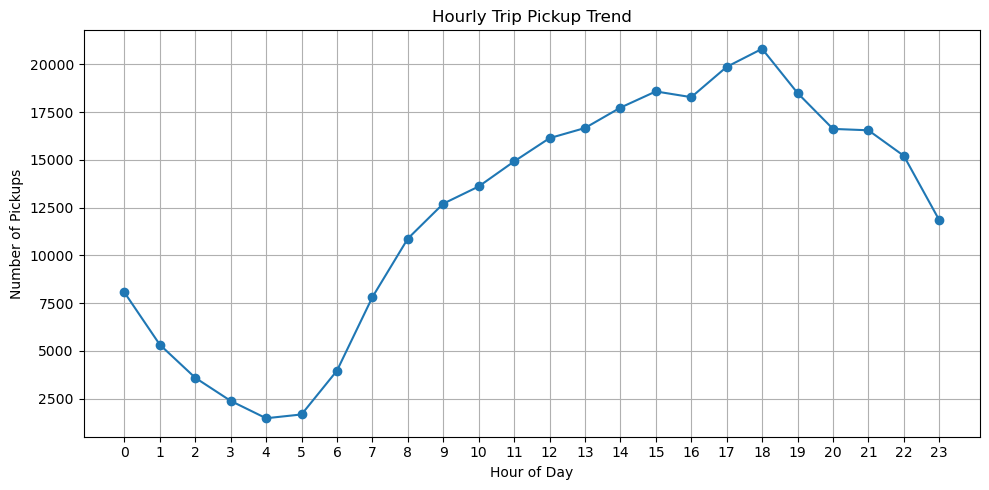

In [206]:
# plot hourly trend and frequency

# Group by pickup hour and count entries
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plot using mplot
plt.figure(figsize=(10, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Hourly Trip Pickup Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

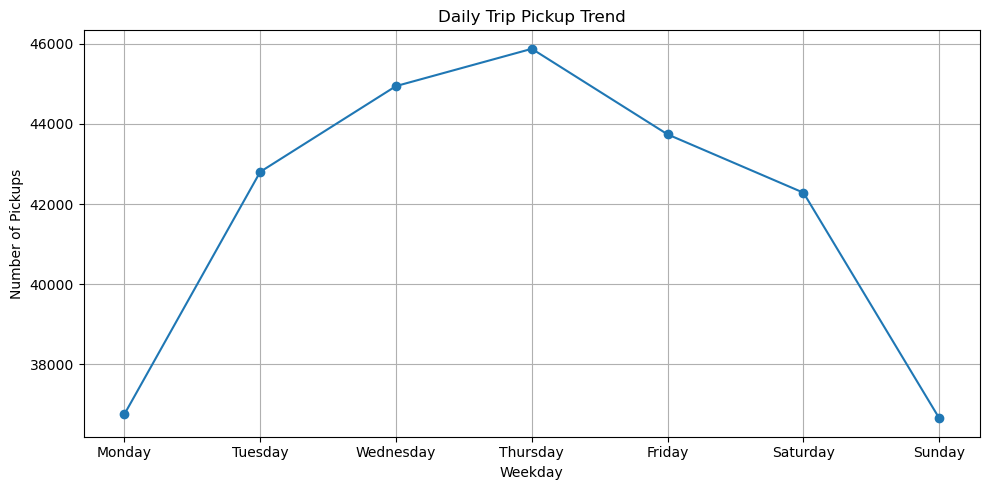

In [211]:
# Find and show the daily trends in taxi pickups (days of the week)


#get the weekday name 
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.day_name()

# Group by pickup hour and count entries

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df['pickup_weekday'].value_counts().reindex(weekday_order)


# Plot using mplot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Daily Trip Pickup Trend')
plt.xlabel('Weekday')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.tight_layout()
plt.show()

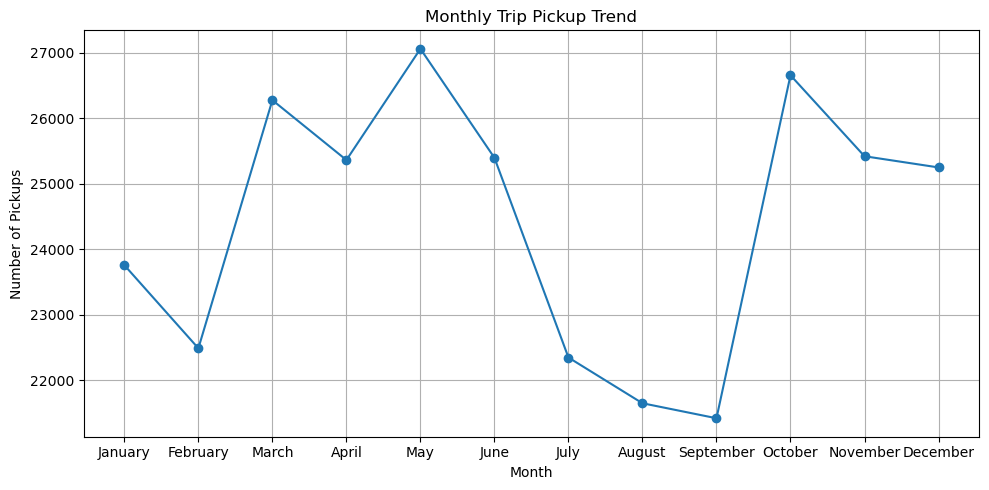

In [216]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

# Group by pickup hour and count entries

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_counts = df['pickup_month'].value_counts().reindex(month_order)

# Plot using mplot
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Trip Pickup Trend')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [226]:
# Analyse the above parameters

df_clean=df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [230]:
#i dont think we must drop those records as there is a finite distancefor same zone

df_clean[df_clean['PULocationID']==df_clean['DOLocationID']]

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
20         2913768         2  2023-12-28 14:41:48   2023-12-28 14:45:35   
162        2258554         2  2023-12-20 12:24:38   2023-12-20 12:28:21   
176         273845         2  2023-12-03 10:41:44   2023-12-03 10:46:52   
206        2495175         2  2023-12-22 15:04:17   2023-12-22 15:06:21   
260        1973932         1  2023-12-17 15:48:06   2023-12-17 15:55:12   
...            ...       ...                  ...                   ...   
303192     1459219         2  2023-06-14 10:48:37   2023-06-14 10:54:59   
303214      639339         2  2023-06-06 20:15:51   2023-06-06 20:36:10   
303220     2458517         2  2023-06-23 15:00:37   2023-06-23 15:09:58   
303263     2435270         2  2023-06-23 12:36:49   2023-06-23 12:50:22   
303308     2108111         2  2023-06-20 14:08:09   2023-06-20 14:14:01   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
20                  1.0           0.48         1.0                  N   
162                 1.0           0.59         1.0                  N   
176                 1.0           0.59         1.0                  N   
206                 2.0           0.34         1.0                  N   
260                 3.0           0.90         1.0                  N   
...                 ...            ...         ...                ...   
303192              2.0           0.64         1.0                  N   
303214              1.0           3.13         1.0                  N   
303220              1.0           1.30         1.0                  N   
303263              1.0           1.85         1.0                  N   
303308              1.0           0.43         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
20               107           107  ...      0.5        2.45           0.0   
162              114           114  ...      0.5        2.94           0.0   
176              231           231  ...      0.5        1.00           0.0   
206              162           162  ...      0.5        1.68           0.0   
260              237           237  ...      0.5        2.35           0.0   
...              ...           ...  ...      ...         ...           ...   
303192           170           170  ...      0.5        2.24           0.0   
303214           264           264  ...      0.5        5.10           0.0   
303220           236           236  ...      0.5        2.94           0.0   
303263           264           264  ...      0.5        3.64           0.0   
303308           170           170  ...      0.5        1.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
20                        1.0         12.25                   2.5   
162                       1.0         12.74                   2.5   
176                       1.0         11.50                   2.5   
206                       1.0         10.08                   2.5   
260                       1.0         14.25                   2.5   
...                       ...           ...                   ...   
303192                    1.0         13.44                   2.5   
303214                    1.0         30.60                   2.5   
303220                    1.0         17.64                   2.5   
303263                    1.0         21.84                   2.5   
303308                    1.0         12.20                   2.5   

        airport_fee  pickup_hour  pickup_weekday  pickup_month  
20              0.0           14        Thursday      December  
162             0.0           12       Wednesday      December  
176             0.0           10          Sunday      December  
206             0.0           15          Friday      December  
260             0.0           15          Sunday      December  
...             ...          ...             ...           ...  
303192   

In [233]:
# Create a df with non zero entries for the selected parameters.

df_final=df_clean[df_clean['PULocationID']!=df_clean['DOLocationID']]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

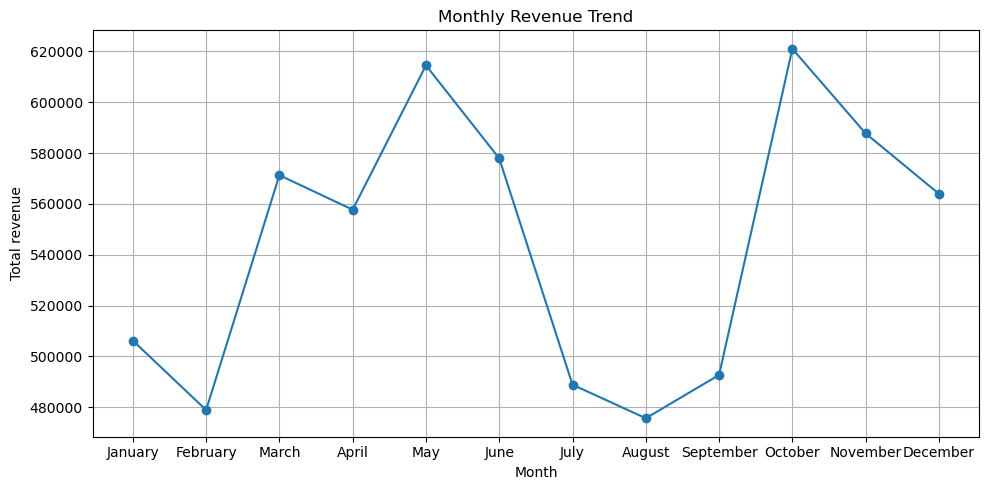

In [237]:
# Group data by month and analyse monthly revenue



month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_counts = df_final.groupby('pickup_month')['total_amount'].sum().reindex(month_order)

# Plot using mplot
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [239]:
# Calculate proportion of each quarter

df_final['pickup_quarter'] = df_final['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df_final.groupby('pickup_quarter')['total_amount'].sum()

/var/folders/x6/7jjr3dq55pb06j_7ms7ksvj40000gn/T/ipykernel_10903/3403983829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pickup_quarter'] = df_final['tpep_pickup_datetime'].dt.quarter


In [242]:
#calc quaterly revenue proportion
revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
revenue_proportion = revenue_proportion.round(2)
print(revenue_proportion)

pickup_quarter
1    23.81
2    26.77
3    22.29
4    27.12
Name: total_amount, dtype: float64


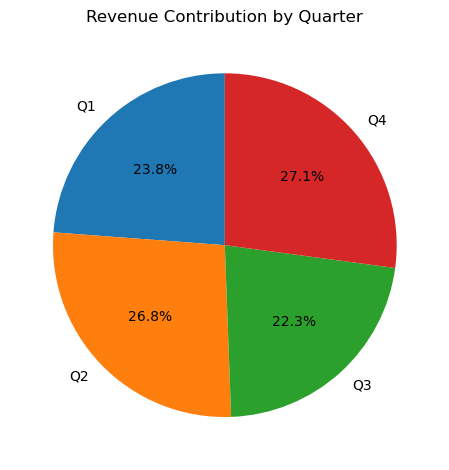

In [247]:
labels = [f"Q{q}" for q in revenue_proportion.index]
plt.pie(revenue_proportion.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Contribution by Quarter')
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

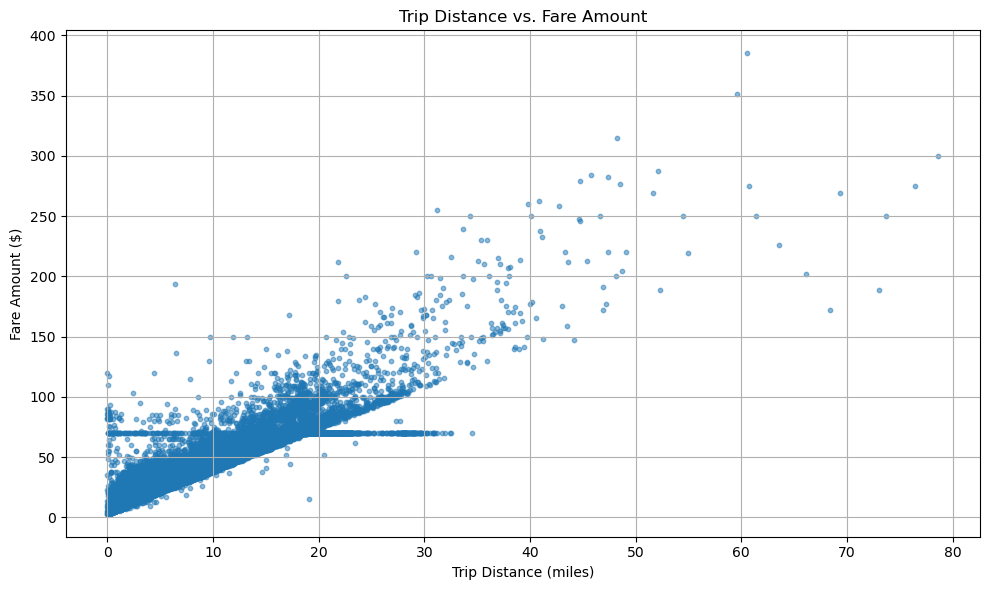

In [248]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 6))
plt.scatter(df_final['trip_distance'], df_final['fare_amount'], alpha=0.5, s=10)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [256]:
#Create new column for trip duration

df_final['trip_duration']=df_final['tpep_dropoff_datetime']-df_final['tpep_pickup_datetime']
df_final['trip_duration_minutes'] = round(df_final['trip_duration'].dt.total_seconds() / 60,2)

/var/folders/x6/7jjr3dq55pb06j_7ms7ksvj40000gn/T/ipykernel_10903/1414046769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['trip_duration']=df_final['tpep_dropoff_datetime']-df_final['tpep_pickup_datetime']
/var/folders/x6/7jjr3dq55pb06j_7ms7ksvj40000gn/T/ipykernel_10903/1414046769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['trip_duration_minutes'] = round(df_final['trip_duration'].dt.total_seconds() / 60,2)


In [264]:
df_final.drop('trip_duration',axis=1,inplace=True)

/var/folders/x6/7jjr3dq55pb06j_7ms7ksvj40000gn/T/ipykernel_10903/453009132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('trip_duration',axis=1,inplace=True)


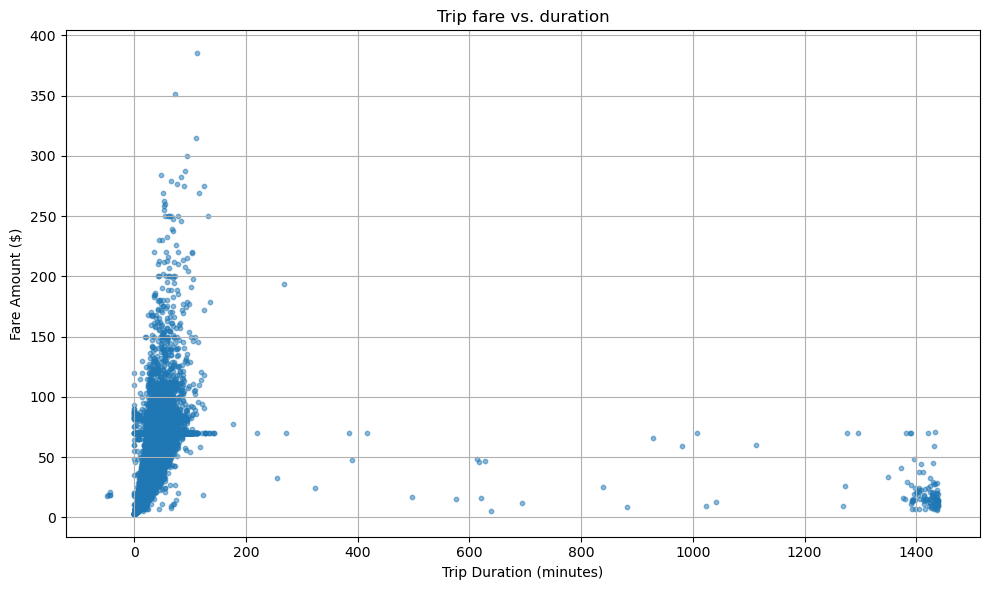

In [258]:
# Show relationship between fare and trip duration

plt.figure(figsize=(10, 6))
plt.scatter(df_final['trip_duration_minutes'], df_final['fare_amount'], alpha=0.5, s=10)
plt.title('Trip fare vs. duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [265]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217004 entries, 1 to 303426
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             217004 non-null  int64         
 1   VendorID               217004 non-null  int64         
 2   tpep_pickup_datetime   217004 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  217004 non-null  datetime64[ns]
 4   passenger_count        217004 non-null  float64       
 5   trip_distance          217004 non-null  float64       
 6   RatecodeID             217004 non-null  float64       
 7   store_and_fwd_flag     217004 non-null  object        
 8   PULocationID           217004 non-null  int64         
 9   DOLocationID           217004 non-null  int64         
 10  payment_type           217004 non-null  int64         
 11  fare_amount            217004 non-null  float64       
 12  extra                  217004 non-null  floa

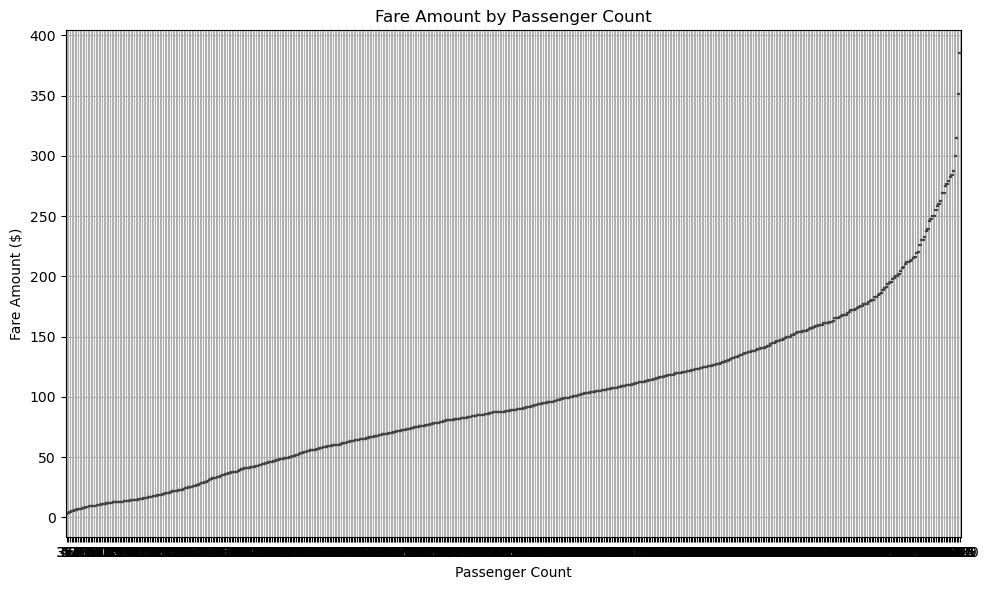

In [266]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_final['fare_amount'], y=df_final['fare_amount'], data=df_final)
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

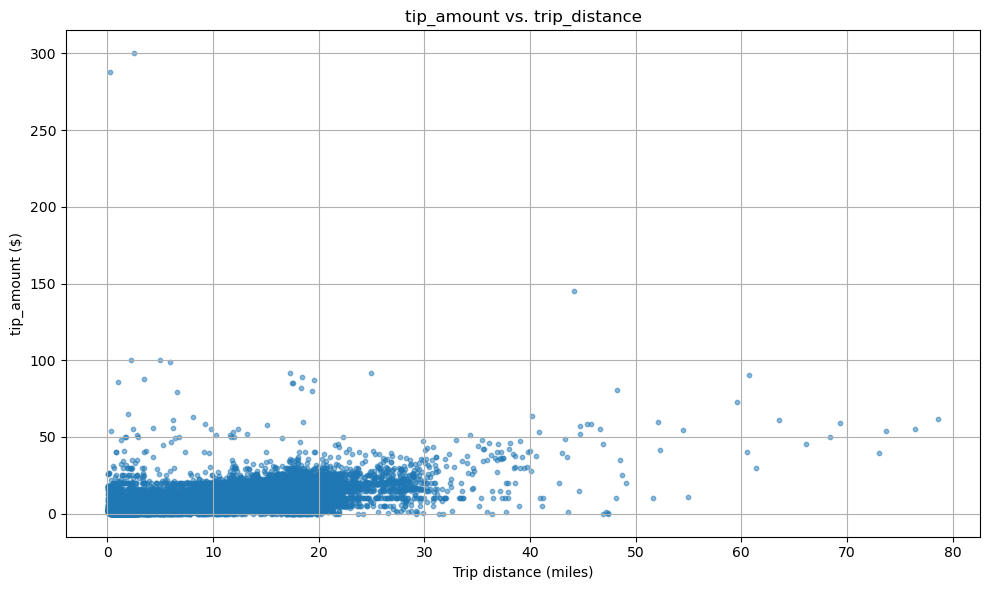

In [267]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
plt.scatter(df_final['trip_distance'], df_final['tip_amount'],alpha=0.5, s=10)
plt.title('tip_amount vs. trip_distance')
plt.xlabel('Trip distance (miles)')
plt.ylabel('tip_amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

1    216999
2         3
4         2
Name: payment_type, dtype: int64


/var/folders/x6/7jjr3dq55pb06j_7ms7ksvj40000gn/T/ipykernel_10903/3225532520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['payment_type_name']=df_final['payment_type'].map(payment_map)


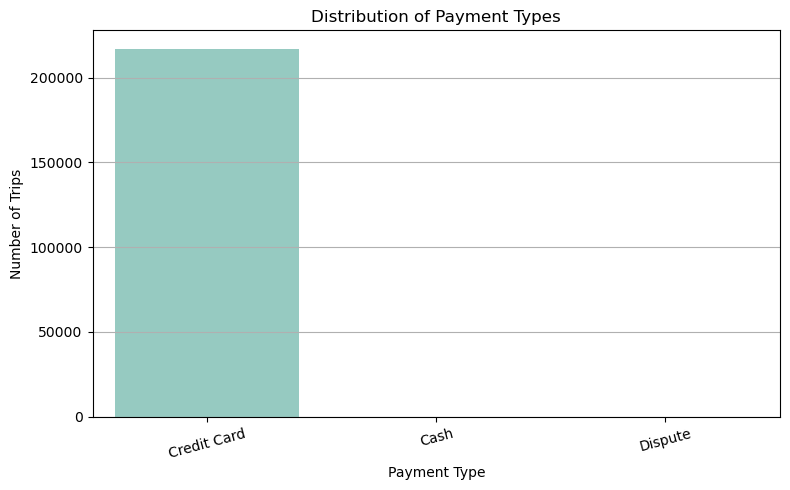

In [275]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df_final['payment_type'].value_counts().sort_index()
print(payment_counts)


#create pament type map

payment_map={1: 'Credit Card',2: 'Cash',3: 'No Charge',4: 'Dispute'}

df_final['payment_type_name']=df_final['payment_type'].map(payment_map)
payment_type_counts=df_final['payment_type_name'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type_name', data=df_final, order=payment_type_counts.index, palette='Set3')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [276]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [25 lines of output]
      Traceback (most recent call last):
        File "/Users/arjunpalit/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 351, in <module>
          main()
        File "/Users/arjunpalit/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 333, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "/Users/arjunpalit/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 152, in prepare_

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [278]:
os.chdir('/Users/arjunpalit/Desktop/Python_Learning/MyProjects/taxi_zones')

In [279]:
os.listdir()

['taxi_zones.dbf',
 'taxi_zones.shp.xml',
 'taxi_zones.shp',
 'taxi_zones.sbx',
 'taxi_zones.shx',
 'taxi_zones.prj',
 'taxi_zones.sbn']

In [280]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [ ]:

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')
zones.head()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [285]:
df_final[['PULocationID','DOLocationID']].unique

AttributeError: 'DataFrame' object has no attribute 'unique'

In [300]:
#Arrive at speeds for each route 

df_final['speed']=df['trip_distance']/(df['trip_duration_minutes']/60)


/var/folders/x6/7jjr3dq55pb06j_7ms7ksvj40000gn/T/ipykernel_10903/952230847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['speed']=df['trip_distance']/(df['trip_duration_minutes']/60)


In [301]:
df_avg_speed_mph=df_final.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed'].mean().reset_index().rename(columns={'speed': 'avg_speed_mph'})


In [302]:
df_avg_speed_mph.head()

PULocationID  DOLocationID  pickup_hour  avg_speed_mph
0             1           232           15      23.694268
1             1           265           13      24.000000
2             4             1           14      24.299747
3             4             7           19      31.476378
4             4            13           13      15.876686

In [303]:
# Find routes which have the slowest speeds at different times of the day

top10_slowest_routes = (
    df_avg_speed_mph
    .sort_values(by='avg_speed_mph')
    .groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
    .first()
    .reset_index()
    .sort_values(by='avg_speed_mph')  # Optional: re-sort after reset_index
    .head(10)
)

In [304]:
top10_slowest_routes

PULocationID  DOLocationID  pickup_hour  avg_speed_mph
37                4            88            1      -4.346000
18884           137            48           15       0.089711
46379           238            50           15       0.112967
21843           140            74           11       0.121457
37671           211           137           22       0.134319
31556           163            41           16       0.166754
32731           164            41            1       0.195385
38332           224           231            1       0.224752
29392           161           129           20       0.235039
52155           263           114           19       0.250091

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

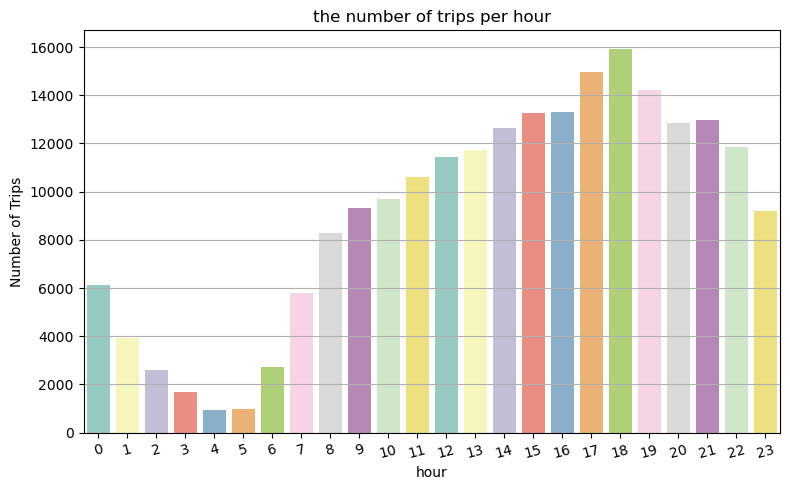

In [308]:
# Visualise the number of trips per hour and find the busiest hour


pickup_hour_counts=df_final['pickup_hour'].value_counts()
sorted_hours = pickup_hour_counts.sort_index().index

plt.figure(figsize=(8, 5))
sns.countplot(x='pickup_hour', data=df_final, order=sorted_hours
              , palette='Set3')
plt.title('the number of trips per hour')
plt.xlabel('hour')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [309]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
hourly_counts = df_final['pickup_hour'].value_counts().sort_values(ascending=False)


#first 5
top_5_hours = hourly_counts.head(5)

# Sampling fraction
sampling_fraction = 0.01  #assumed as 0.01

#  Scale up the counts to estimate full dataset
top_5_scaled = (top_5_hours / sampling_fraction).astype(int)

#  Display the result
result_df = pd.DataFrame({
    'pickup_hour': top_5_scaled.index,
    'sample_trip_count': top_5_hours.values,
    'estimated_total_trips': top_5_scaled.values
})

print(result_df)




   pickup_hour  sample_trip_count  estimated_total_trips
0           18              15902                1590200
1           17              14964                1496400
2           19              14201                1420100
3           16              13288                1328800
4           15              13278                1327800


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

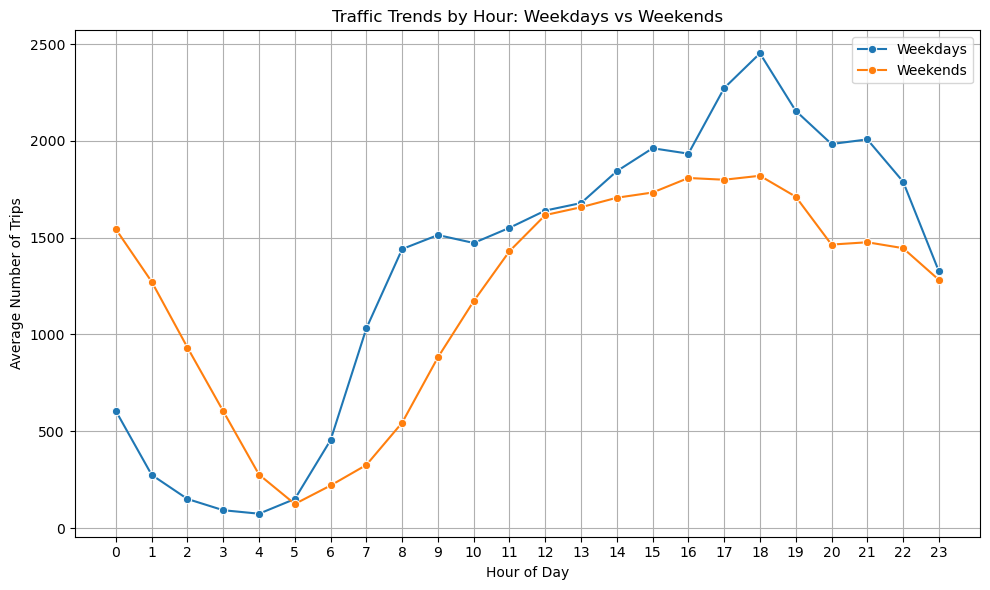

In [310]:
# Compare traffic trends for the week days and weekends

#  weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

#  Group by hour and weekday, and count trips
hourly_weekday_counts = df_final.groupby(['pickup_weekday', 'pickup_hour']).size().reset_index(name='trip_count')

#  weekday and weekend data
weekday_data = hourly_weekday_counts[hourly_weekday_counts['pickup_weekday'].isin(weekdays)]
weekend_data = hourly_weekday_counts[hourly_weekday_counts['pickup_weekday'].isin(weekends)]


weekday_avg = weekday_data.groupby('pickup_hour')['trip_count'].mean().reset_index(name='avg_trips')
weekend_avg = weekend_data.groupby('pickup_hour')['trip_count'].mean().reset_index(name='avg_trips')


plt.figure(figsize=(10, 6))

sns.lineplot(data=weekday_avg, x='pickup_hour', y='avg_trips', label='Weekdays', marker='o')
sns.lineplot(data=weekend_avg, x='pickup_hour', y='avg_trips', label='Weekends', marker='o')

plt.title('Traffic Trends by Hour: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
   PULocationID  num_pickups
0           161        10592
1           132        10216
2           237        10162
3           236         9070
4           138         8267
5           162         8140
6           186         7822
7           142         7460
8           230         7072
9           163         6640

Top 10 Dropoff Zones:
   DOLocationID  num_dropoffs
0           236          9764
1           237          8986
2           161          8511
3           170          6770
4           239          6424
5           142          6338
6           162          6306
7           230          6165
8           141          5999
9           234          5595


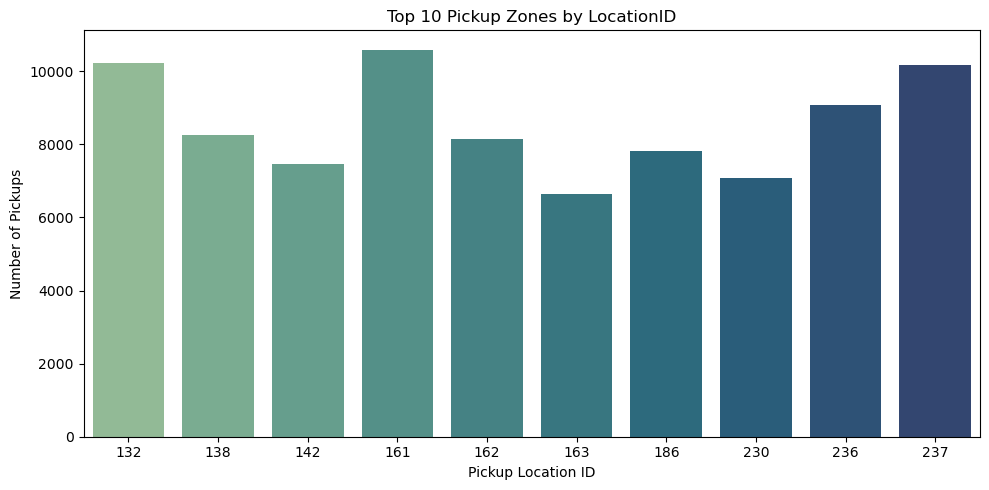

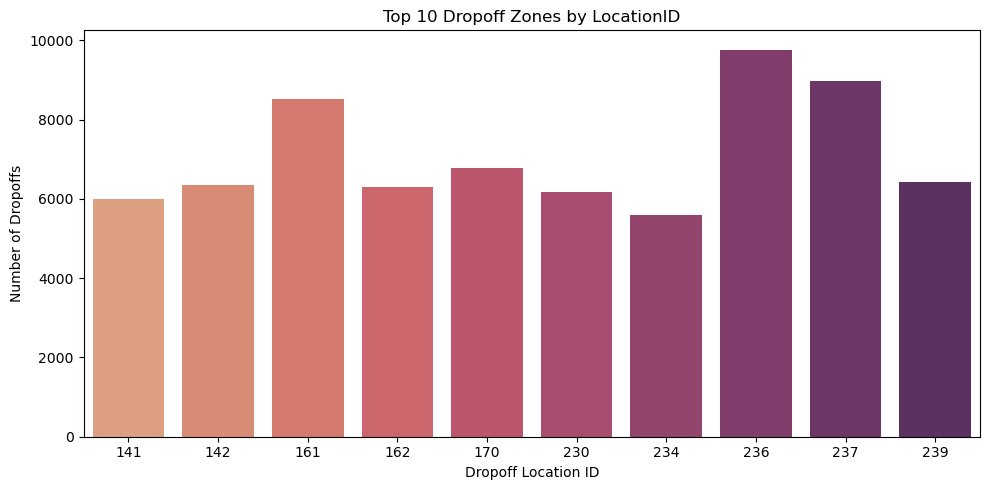

In [312]:
# Find top 10 pickup and dropoff zones

top_pickups = df_final['PULocationID'].value_counts().head(10).reset_index()
top_pickups.columns = ['PULocationID', 'num_pickups']

# Top 10 Dropoff Zones
top_dropoffs = df_final['DOLocationID'].value_counts().head(10).reset_index()
top_dropoffs.columns = ['DOLocationID', 'num_dropoffs']

print("Top 10 Pickup Zones:")
print(top_pickups)

print("\nTop 10 Dropoff Zones:")
print(top_dropoffs)




# --- Plot top pickups ---
plt.figure(figsize=(10, 5))
sns.barplot(data=top_pickups, x='PULocationID', y='num_pickups', palette='crest')
plt.title('Top 10 Pickup Zones by LocationID')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

# --- Plot top dropoffs ---
plt.figure(figsize=(10, 5))
sns.barplot(data=top_dropoffs, x='DOLocationID', y='num_dropoffs', palette='flare')
plt.title('Top 10 Dropoff Zones by LocationID')
plt.xlabel('Dropoff Location ID')
plt.ylabel('Number of Dropoffs')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [313]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs
pickup_counts = df_final['PULocationID'].value_counts().rename('num_pickups')
dropoff_counts = df_final['DOLocationID'].value_counts().rename('num_dropoffs')

# Combine into one DataFrame
pickup_dropoff_df = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Compute pickup/dropoff ratio
pickup_dropoff_df['pickup_dropoff_ratio'] = pickup_dropoff_df['num_pickups'] / pickup_dropoff_df['num_dropoffs']
top_10_ratios = pickup_dropoff_df.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

Top 10 Pickup/Dropoff Ratios:
     num_pickups  num_dropoffs  pickup_dropoff_ratio
70        1039.0            79             13.151899
132      10216.0          2096              4.874046
138       8267.0          2869              2.881492
207          2.0             1              2.000000
186       7822.0          4711              1.660369
43        3731.0          2593              1.438874
114       3176.0          2295              1.383878
249       5290.0          3944              1.341278
162       8140.0          6306              1.290834
161      10592.0          8511              1.244507


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [314]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Define night hours: 11 PM (23) to 5 AM (5)
night_hours = list(range(0, 6)) + [23]

# Filter trips during night hours
df_night = df_final[df_final['pickup_hour'].isin(night_hours)]

top_night_pickups = (
    df_night['PULocationID']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'PULocationID', 'PULocationID': 'num_pickups'})
)

top_night_dropoffs = (
    df_night['DOLocationID']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'DOLocationID', 'DOLocationID': 'num_dropoffs'})
)

In [315]:
top_night_pickups

PULocationID  num_pickups
0            79         1921
1           249         1556
2           132         1483
3           148         1263
4            48         1222
5           114         1162
6           230          931
7           186          864
8           138          777
9           234          759

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

/var/folders/x6/7jjr3dq55pb06j_7ms7ksvj40000gn/T/ipykernel_10903/4241595144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['is_night'] = df_final['pickup_hour'].isin(night_hours)


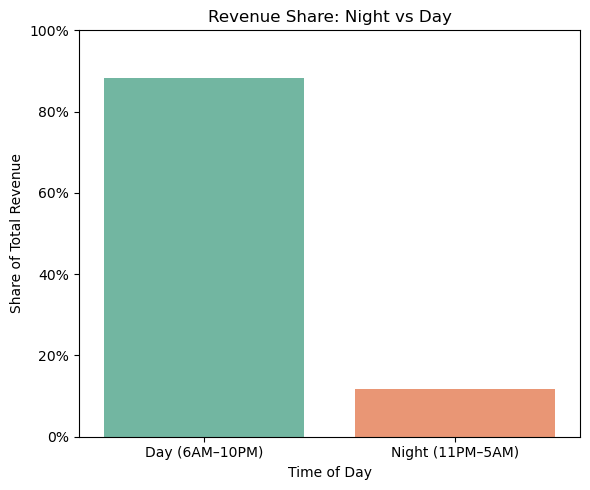

In [317]:
# Filter for night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Flag each row as night or day
df_final['is_night'] = df_final['pickup_hour'].isin(night_hours)

#Group by is_night and sum revenue
revenue_by_time = df_final.groupby('is_night')['total_amount'].sum().reset_index()

# Rename for clarity
revenue_by_time.columns = ['is_night', 'total_revenue']
revenue_by_time['time_period'] = revenue_by_time['is_night'].map({True: 'Night (11PM–5AM)', False: 'Day (6AM–10PM)'})

# Calculate revenue share
total_revenue = revenue_by_time['total_revenue'].sum()
revenue_by_time['revenue_share'] = revenue_by_time['total_revenue'] / total_revenue

plt.figure(figsize=(6, 5))
sns.barplot(data=revenue_by_time, x='time_period', y='revenue_share', palette='Set2')
plt.title('Revenue Share: Night vs Day')
plt.ylabel('Share of Total Revenue')
plt.xlabel('Time of Day')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

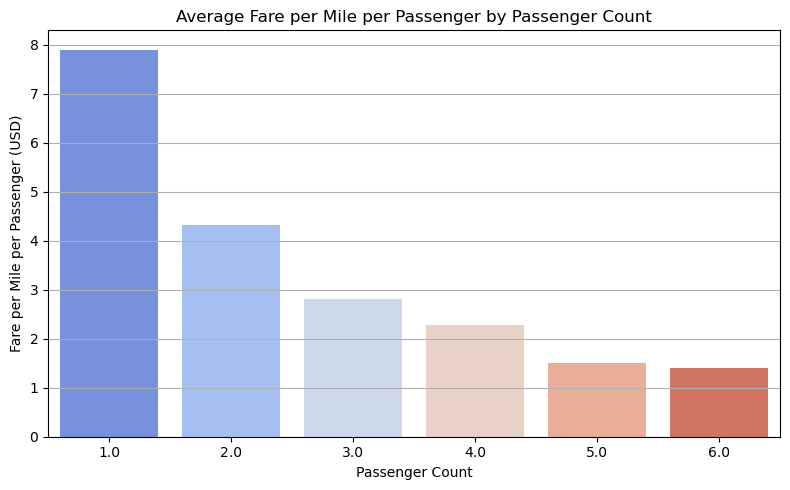

In [318]:
# Analyse the fare per mile per passenger for different passenger counts

# filter out rows with zero distance or passenger count
df_valid = df_final[(df_final['trip_distance'] > 0) & (df_final['passenger_count'] > 0)]

# Compute fare per mile per passenger
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])
fare_stats = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].agg(['mean', 'median', 'count']).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_stats, x='passenger_count', y='mean', palette='coolwarm')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

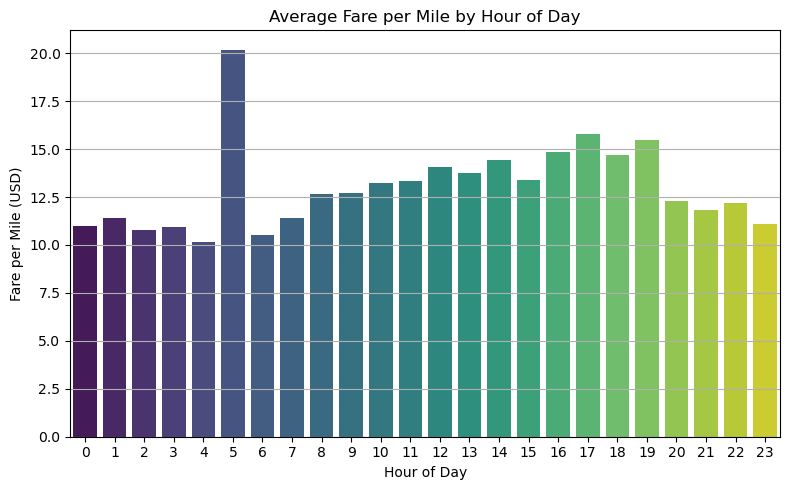

In [319]:
# Compare the average fare per mile for different days and for different times of the day
df_valid = df_final[df_final['trip_distance'] > 0].copy()
df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']
fare_by_hour = df_valid.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

#plot

plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_hour, x='pickup_hour', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


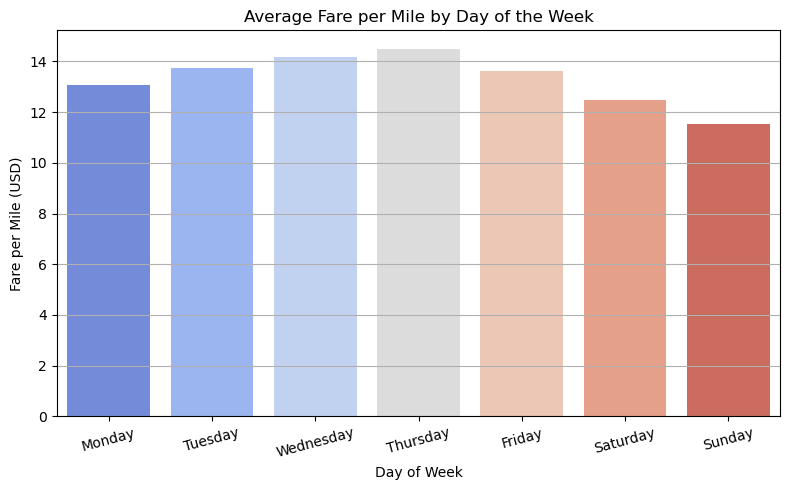

In [320]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fare_by_weekday = df_valid.groupby('pickup_weekday')['fare_per_mile'].mean().reindex(weekday_order).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_weekday, x='pickup_weekday', y='fare_per_mile', palette='coolwarm')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare per Mile (USD)')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


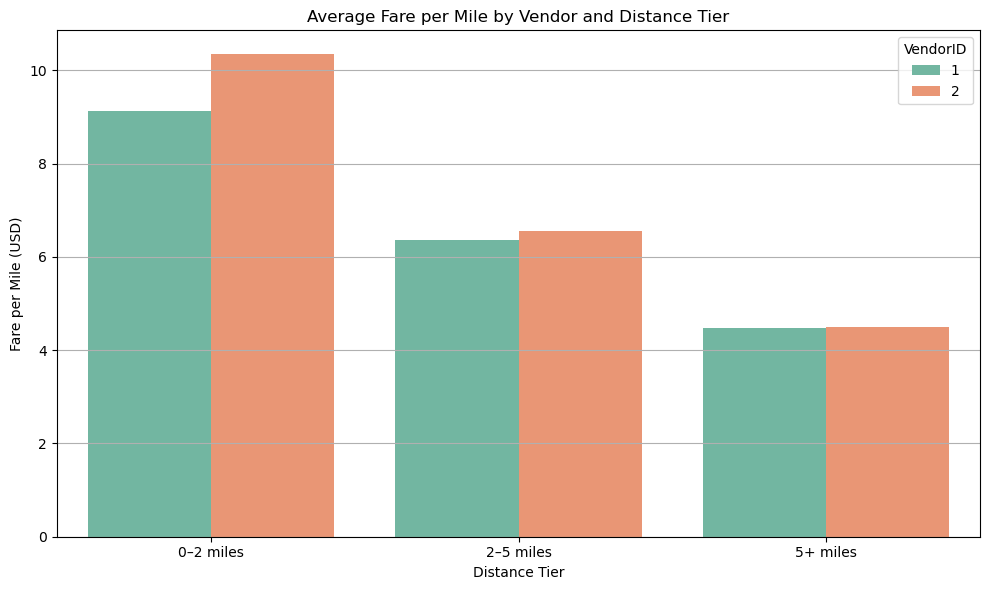

In [322]:
# Defining distance tiers

df_valid = df_final[
    (df_final['trip_distance'] > 0) & (df_final['total_amount'] > 0)
].copy()

df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']


def distance_category(miles):
    if miles <= 2:
        return '0–2 miles'
    elif miles <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

df_valid['distance_tier'] = df_valid['trip_distance'].apply(distance_category)


vendor_fare_by_tier = (
    df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(by=['distance_tier', 'fare_per_mile'], ascending=[True, False])
)
plt.figure(figsize=(10, 6))
sns.barplot(data=vendor_fare_by_tier, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='Set2')

plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

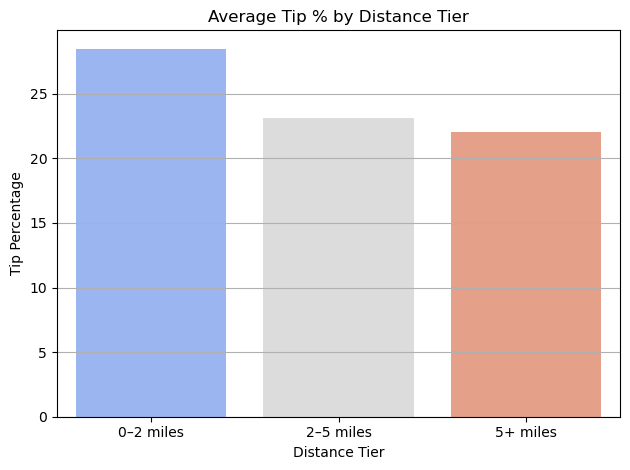

In [323]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_valid = df_final[
    (df_final['fare_amount'] > 0) & (df_final['tip_amount'] >= 0)
].copy()

df_valid['tip_percent'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100



def distance_category(miles):
    if miles <= 2:
        return '0–2 miles'
    elif miles <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

df_valid['distance_tier'] = df_valid['trip_distance'].apply(distance_category)

distance_tip = (
    df_valid.groupby('distance_tier')['tip_percent']
    .mean()
    .reset_index()
    .sort_values(by='tip_percent', ascending=False)
)

sns.barplot(data=distance_tip, x='distance_tier', y='tip_percent', palette='coolwarm')
plt.title('Average Tip % by Distance Tier')
plt.ylabel('Tip Percentage')
plt.xlabel('Distance Tier')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

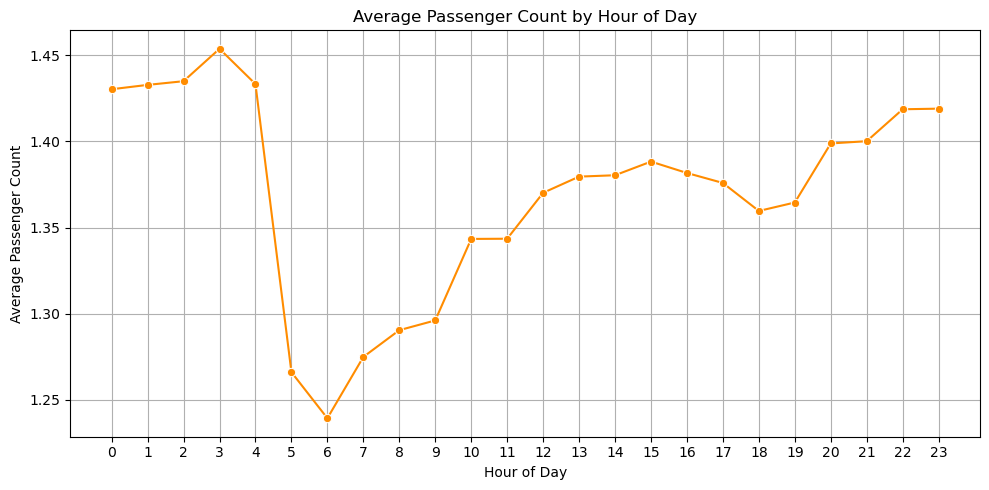

In [324]:
# See how passenger count varies across hours 

hourly_passenger_count = (
    df_final.groupby('pickup_hour')['passenger_count']
    .mean()
    .reset_index()
)



plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_passenger_count, x='pickup_hour', y='passenger_count', marker='o', color='darkorange')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


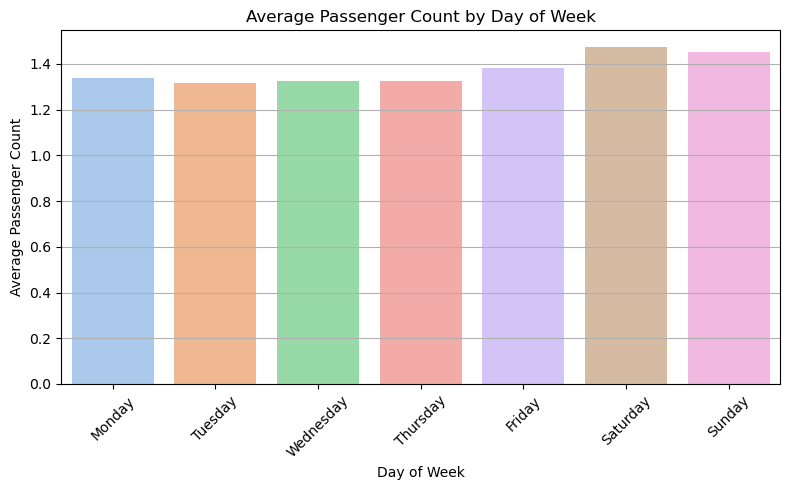

In [325]:
# See how passenger count varies across DAY


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_passenger_count = (
    df_final.groupby('pickup_weekday')['passenger_count']
    .mean()
    .reindex(weekday_order)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_passenger_count, x='pickup_weekday', y='passenger_count', palette='pastel')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

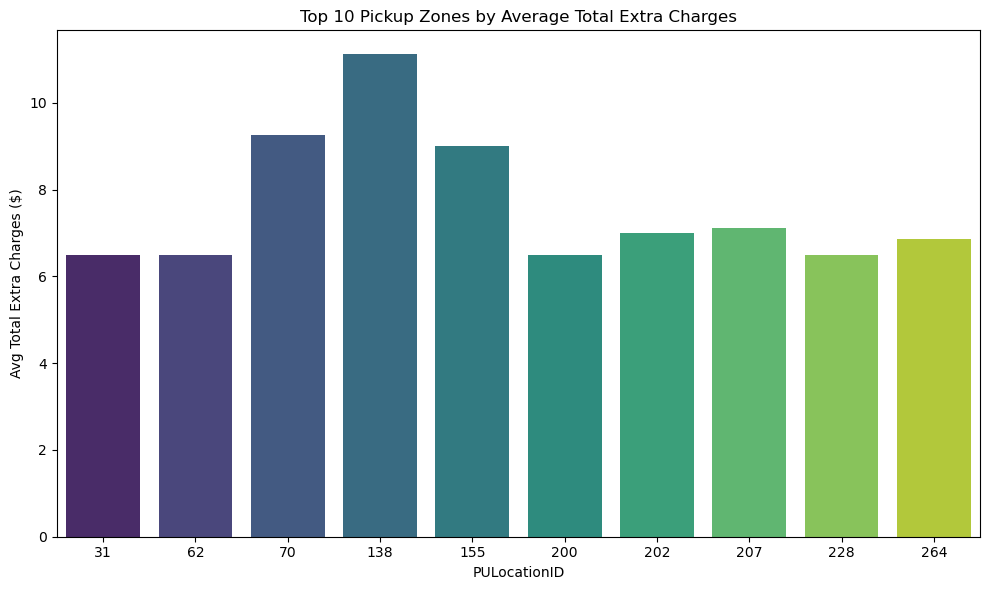

In [326]:
# How often is each surcharge applied?

extra_by_zone = (
    df_final.groupby('PULocationID')[['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee', 'improvement_surcharge']]
    .mean()
    .reset_index()
)

# top 10 zones with highest total average surcharge
extra_by_zone['total_extra'] = extra_by_zone[['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee', 'improvement_surcharge']].sum(axis=1)
top_zones = extra_by_zone.sort_values(by='total_extra', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_zones, x='PULocationID', y='total_extra', palette='viridis')
plt.title('Top 10 Pickup Zones by Average Total Extra Charges')
plt.xlabel('PULocationID')
plt.ylabel('Avg Total Extra Charges ($)')
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Answered in report file

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Answered in report file

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Answered in report file